In [1]:
import numpy as np
import os,sys
import pandas as pd
import copy 


In [2]:
df_orig=pd.read_csv("double_perovskites_dft_predictions.csv")

In [3]:
print(df_orig.head(),df_orig.shape,df_orig.columns)

  correct_formula   lat_bvm   lat_opt  oszi_opt    hf_opt
0       Cs2AgBiF6  6.603529  6.736332        70 -2.508639
1       Cs2AlAgF6  6.285331  6.256387        77 -2.997612
2       Cs2AlRbF6  6.497463  6.494910        81 -3.382740
3      Cs2BaPtCl6  7.782347  7.862865        83 -1.759556
4      Cs2CaCoCl6  7.384953  7.384952        83 -1.889819 (745, 5) Index(['correct_formula', 'lat_bvm', 'lat_opt', 'oszi_opt', 'hf_opt'], dtype='object')


In [4]:
df_orig.dtypes

correct_formula     object
lat_bvm            float64
lat_opt            float64
oszi_opt             int64
hf_opt             float64
dtype: object

In [5]:
def string_filler(string_in):
    string_out=''
    for i in range (len(string_in)):
        if string_in[i]=='2':
            string_out+=string_in[i-2:i]
        else:
            string_out+=string_in[i]
    return string_out
    
def return_sites(string_inp):
    string_in=string_filler(string_inp[:-1])
    lst_out=[]
    for i in range (0,len(string_in),2):
        lst_out.append(string_in[i:i+2].split('_')[0])
    return lst_out

In [6]:
dir_list=df_orig.correct_formula.unique().tolist()
double_list=[]
for entries in dir_list:
    sites=return_sites(entries)
    if len(sites)==3:
        pass
    else:
        double_list.append([entries,sites[0],sites[1],sites[2],sites[3],sites[4]])
double_heading=['compound','A',"A'",'B',"B'",'X']
double_df=pd.DataFrame(double_list,columns=double_heading)

In [7]:
df_test=pd.concat([df_orig,double_df],axis=1)

In [8]:
df_test.head()

,correct_formula,lat_bvm,lat_opt,oszi_opt,hf_opt,compound,A,A',B,B',X
0,Cs2AgBiF6,6.603529,6.736332,70,-2.508639,Cs2AgBiF6,Cs,Cs,Ag,Bi,F
1,Cs2AlAgF6,6.285331,6.256387,77,-2.997612,Cs2AlAgF6,Cs,Cs,Al,Ag,F
2,Cs2AlRbF6,6.497463,6.494910,81,-3.382740,Cs2AlRbF6,Cs,Cs,Al,Rb,F
3,Cs2BaPtCl6,7.782347,7.862865,83,-1.759556,Cs2BaPtCl6,Cs,Cs,Ba,Pt,Cl
4,Cs2CaCoCl6,7.384953,7.384952,83,-1.889819,Cs2CaCoCl6,Cs,Cs,Ca,Co,Cl


In [9]:
df_test['bvm_oqmd_lat_err']=100*(df_test['lat_bvm']-df_test['lat_opt'])/df_test['lat_opt']

In [10]:
df_test.head()

,correct_formula,lat_bvm,lat_opt,oszi_opt,hf_opt,compound,A,A',B,B',X,bvm_oqmd_lat_err
0,Cs2AgBiF6,6.603529,6.736332,70,-2.508639,Cs2AgBiF6,Cs,Cs,Ag,Bi,F,-1.971445
1,Cs2AlAgF6,6.285331,6.256387,77,-2.997612,Cs2AlAgF6,Cs,Cs,Al,Ag,F,0.462622
2,Cs2AlRbF6,6.497463,6.494910,81,-3.382740,Cs2AlRbF6,Cs,Cs,Al,Rb,F,0.039301
3,Cs2BaPtCl6,7.782347,7.862865,83,-1.759556,Cs2BaPtCl6,Cs,Cs,Ba,Pt,Cl,-1.024040
4,Cs2CaCoCl6,7.384953,7.384952,83,-1.889819,Cs2CaCoCl6,Cs,Cs,Ca,Co,Cl,0.000004


In [11]:
df_test.shape
df_test.to_csv('summary_bvm_calculations.csv')

In [12]:
mask1 = (df_test.bvm_oqmd_lat_err<5.0)&(df_test.bvm_oqmd_lat_err>-5.0)

In [13]:
#df_test_reliable=df_test[(df_test.bvm_oqmd_lat_err<5.0)&(df_test.bvm_oqmd_lat_err>-5.0)]
df_test_reliable=df_test[mask1];df_rest=df_test[~mask1]

In [14]:
print(df_test_reliable.shape,df_rest.shape)


(651, 12) (94, 12)


In [15]:
mask2 = (df_rest.bvm_oqmd_lat_err<10.0)&(df_rest.bvm_oqmd_lat_err>-10.0)
df_test_uncertain=df_rest[mask2];df_test_unreliable=df_rest[~mask2]

In [16]:
#df_test_reliable.to_csv('reliable_training.csv')
#df_test_uncertain.to_csv('moderate_reliable_training.csv')
#df_test_unreliable.to_csv('unreliable_training.csv')

In [17]:
print(df_test_uncertain.shape,df_test_unreliable.shape)

(89, 12) (5, 12)


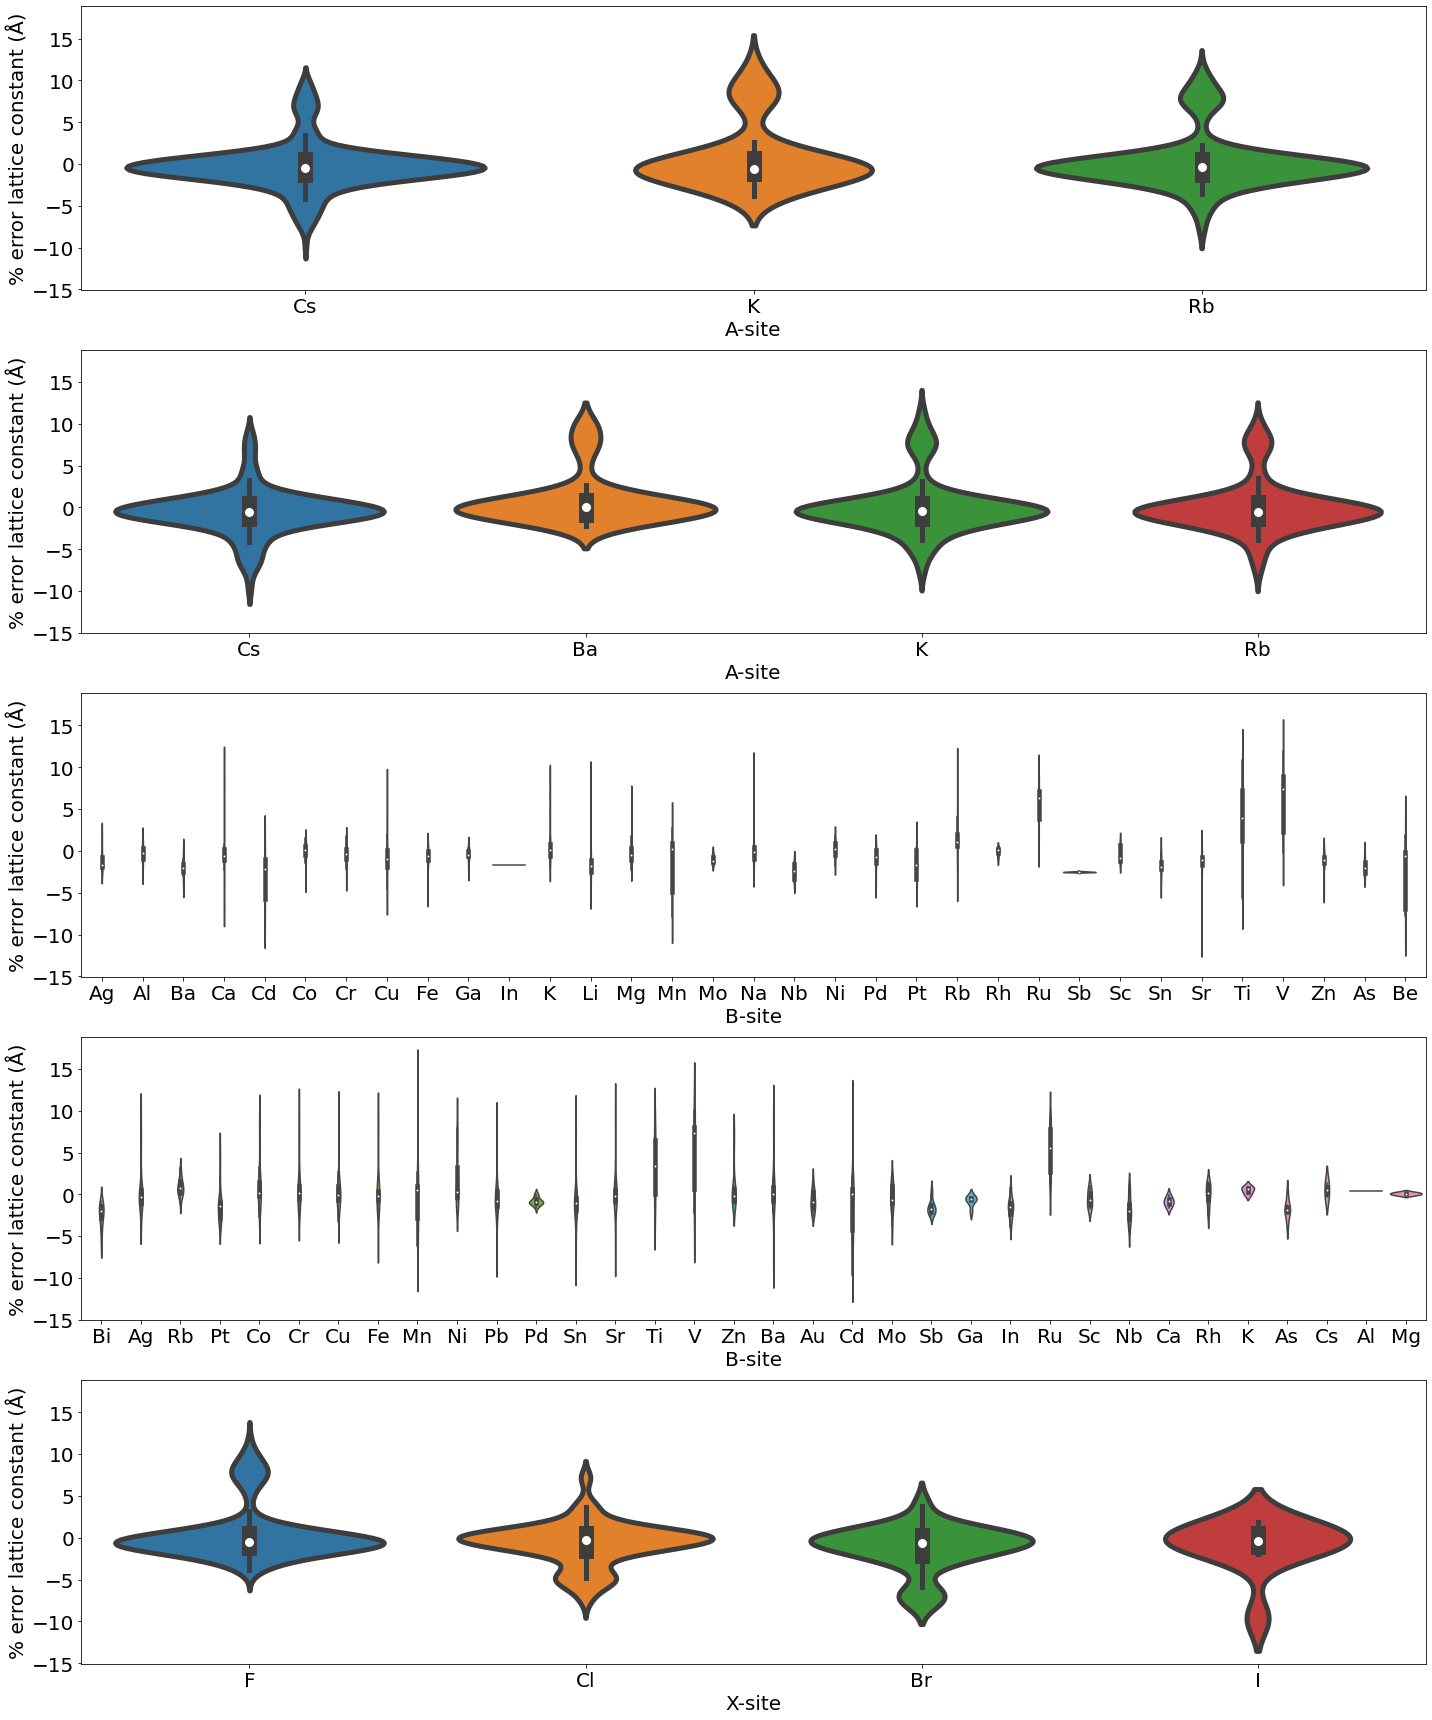

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
figsize=(20,24);axis_width=2;zorder=100;fontsize=20
df_ref=copy.deepcopy(df_test)
y1=df_ref.bvm_oqmd_lat_err
fig, ax = plt.subplots(nrows=5, ncols=1, sharex=False, sharey=True, figsize=figsize)
#sns.violinplot(y=df_test.bvm_oqmd_lat_err,x=df_test.A,opacity=1.0,linewidth=2.0,cut=0.0)
plt.subplot(511)
sns.violinplot(y=y1,x=df_ref.A,opacity=1.0,linewidth=5.0)
plt.xlabel('A-site',fontsize=fontsize);plt.xticks(fontsize=fontsize)
plt.ylabel('% error lattice constant (Å)', fontsize=fontsize);plt.yticks(fontsize=fontsize)
plt.subplot(512)
sns.violinplot(y=y1,x=df_ref["A'"],opacity=1.0,linewidth=5.0)
plt.xlabel('A-site',fontsize=fontsize);plt.xticks(fontsize=fontsize)
plt.ylabel('% error lattice constant (Å)', fontsize=fontsize);plt.yticks(fontsize=fontsize)
plt.subplot(513)
sns.violinplot(y=y1,x=df_ref.B,opacity=1.0,linewidth=1.5)
plt.xlabel('B-site',fontsize=fontsize);plt.xticks(fontsize=fontsize)
plt.ylabel('% error lattice constant (Å)', fontsize=fontsize);plt.yticks(fontsize=fontsize)
plt.subplot(514)
sns.violinplot(y=y1,x=df_ref["B'"],opacity=1.0,linewidth=1.5)
plt.xlabel('B-site',fontsize=fontsize);plt.xticks(fontsize=fontsize)
plt.ylabel('% error lattice constant (Å)', fontsize=fontsize);plt.yticks(fontsize=fontsize)
plt.subplot(515)
sns.violinplot(y=y1,x=df_ref.X,opacity=1.0,linewidth=5.0)
plt.xlabel('X-site',fontsize=fontsize);plt.xticks(fontsize=fontsize)
plt.ylabel('% error lattice constant (Å)', fontsize=fontsize);plt.yticks(fontsize=fontsize)
plt.tight_layout()
plt.show()
plt.close()

In [ ]:
df_test_final

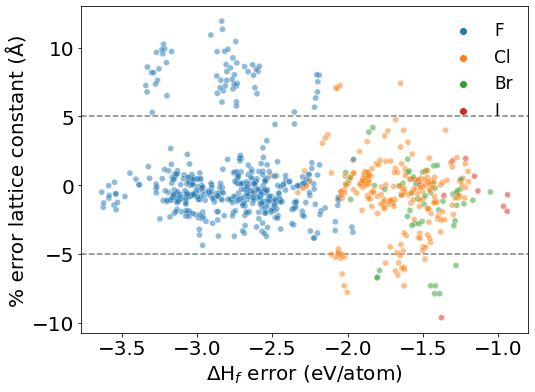

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
figsize=(8,6);axis_width=2;zorder=100;fontsize=20
df_ref=copy.deepcopy(df_test)
y1=df_ref.bvm_oqmd_lat_err
x1=df_ref.hf_opt
#x1=df_ref.hf_opt
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=True, figsize=figsize)
'''
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=False, sharey=True, figsize=figsize)
#sns.violinplot(y=df_test.bvm_oqmd_lat_err,x=df_test.A,opacity=1.0,linewidth=2.0,cut=0.0)
plt.subplot(311)
sns.violinplot(y=y1,x=df_ref.A,opacity=1.0,linewidth=1.5,cut=0.0)
plt.xlabel('A-site',fontsize=fontsize);plt.xticks(fontsize=fontsize)
plt.ylabel('% error lattice constant (Å)', fontsize=fontsize);plt.yticks(fontsize=fontsize)
plt.subplot(312)
sns.violinplot(y=y1,x=df_ref.B,opacity=1.0,linewidth=1.5,cut=0.0)
plt.xlabel('B-site',fontsize=fontsize);plt.xticks(fontsize=fontsize)
plt.ylabel('% error lattice constant (Å)', fontsize=fontsize);plt.yticks(fontsize=fontsize)
plt.subplot(313)
'''
loc= 'upper right' # loc='upper right' , 'lower left'
sns.scatterplot(x=x1,y=y1,hue=df_ref.X,alpha=0.5)
plt.xlabel('$\Delta$H$_f$ error (eV/atom)',fontsize=fontsize);plt.xticks(fontsize=fontsize)
plt.ylabel('% error lattice constant (Å)', fontsize=fontsize);plt.yticks(fontsize=fontsize)
plt.axhline(y=-5.0,linestyle='--',color='grey',zorder=0.01)
plt.axhline(y=5.0,linestyle='--',color='grey',zorder=0.01)
#plt.axvline(x=0.0,linestyle='--',color='grey',zorder=0.01)
#plt.ylim(-0.1,5)
plt.legend(fontsize=fontsize-3,frameon=False,loc=loc)
plt.show()
plt.close()